<a href="https://colab.research.google.com/github/nathn-s/Hackbio-Biocoding-Internship/blob/main/HackBio_Task3_part1_PCA_KMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the data
data = "https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/drug_class_struct.txt"
df = pd.read_csv(data, sep="\t")

In [22]:
# Select chemical descriptor columns
descriptor_cols = [
    'MW', 'MW_EXACT', 'XLogP', 'HBA', 'HBD', 'LIPINSKI_COUNT',
    'BondCount', 'FSP3', 'RotBondCount', 'HalogenCount', 'SpiroCount',
    'PosCount', 'NegCount', 'ComponentCount', 'SimpleRingCount',
    'AromaticRingCount'
]

X = df[descriptor_cols]
y_score = df['score']  # Docking scores

# Handle missing values (if any) and scale the data
X = X.fillna(X.mean())  # Impute missing values with the mean
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

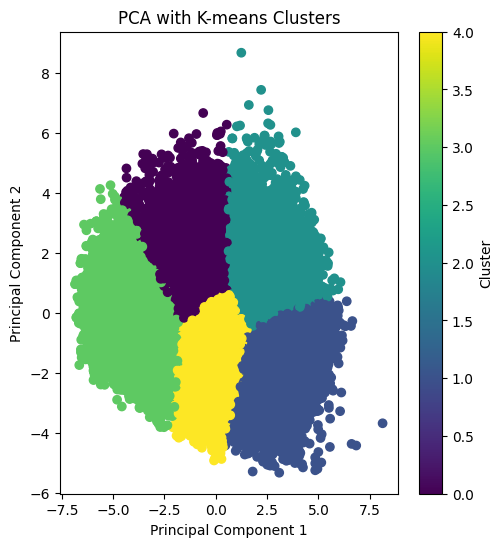

In [23]:
# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose the number of clusters
labels = kmeans.fit_predict(X_pca)

# Visualize PCA with K-means clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('PCA with K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')


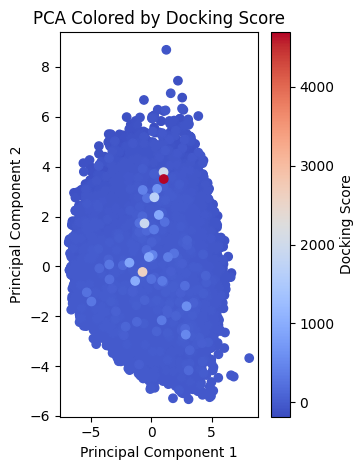

In [5]:
# Visualize PCA colored by docking score
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_score, cmap='coolwarm')
plt.title('PCA Colored by Docking Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Docking Score')
plt.tight_layout()
plt.show()

Mean Docking Scores per Cluster:
0   -85.563683
1   -64.259959
2   -78.417309
3   -61.081620
4   -65.006973
Name: score, dtype: float64

Cluster with Lowest Mean Docking Score: Cluster 0


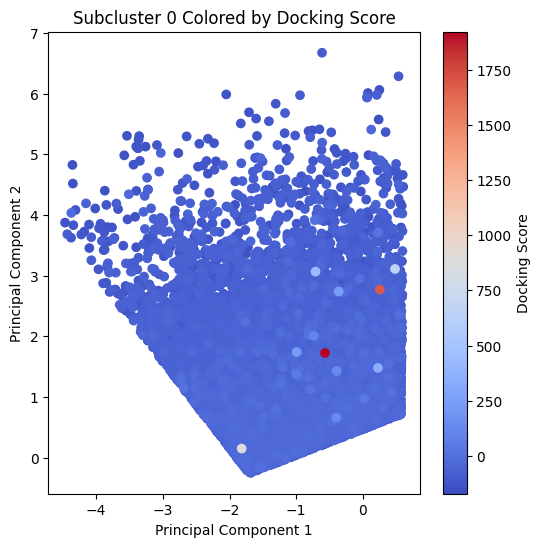

In [6]:
# Identify subclusters with lower docking scores
cluster_means = df.groupby(labels)['score'].mean()
print("Mean Docking Scores per Cluster:")
print(cluster_means)

# Find the cluster with the lowest mean docking score
lowest_mean_cluster = cluster_means.idxmin()
print(f"\nCluster with Lowest Mean Docking Score: Cluster {lowest_mean_cluster}")

# Visualize the subcluster
subcluster_pca = X_pca[labels == lowest_mean_cluster]
subcluster_scores = y_score[labels == lowest_mean_cluster]

plt.figure(figsize=(6, 6))
plt.scatter(subcluster_pca[:, 0], subcluster_pca[:, 1], c=subcluster_scores, cmap='coolwarm')
plt.title(f'Subcluster {lowest_mean_cluster} Colored by Docking Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Docking Score')
plt.show()

In [7]:
# Interpret the special cluster (lowest score cluster).
# to get the compounds of the lowest score cluster.
lowest_cluster_df = df[labels == lowest_mean_cluster]

print("\nCompounds in the lowest docking score cluster:")
print(lowest_cluster_df.head())


Compounds in the lowest docking score cluster:
                                                   ID     score  \
1                                  (DESMILES:1090761) -172.2308   
4                 (DESMILES:2774222,DESMILES:6558061) -164.5410   
9                                  (DESMILES:2825605) -158.4949   
11                (DESMILES:1643741,DESMILES:5159468) -157.8417   
15  (DESMILES:11755501,DESMILES:5325845,DESMILES:7... -155.1390   

                                            SMILES target      MW    MW_EXACT  \
1         CCOC(=O)c1cn[nH]c1S(=O)(=O)NC(CN)C1CCCC1    ada  330.40  330.136169   
4       CC(NC(=O)O)[C@H](CC1CCCCC1)NC(=O)OC(C)(C)C    ada  314.42  314.220551   
9          CCOC(=O)c1cn[nH]c1S(=O)(=O)NC1CCNC(C)C1    ada  316.38  316.120514   
11      CC(CN(CC(O)c1ccccc1)C(=O)OC(C)(C)C)NC(=O)O    ada  338.40  338.184174   
15  O=C(O)NCCO[C@@H](c1cc(F)cc(Cl)c1)[C@@H]1CCCNC1    ada  330.78  330.114655   

    XLogP  HBA  HBD  LIPINSKI_COUNT  ...  BondCount   FSP3  Ro